## 1. Install and Import Dependencies

In [1]:
! git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [2]:
!cd yolov5 & pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

## 2. Load Model

In [43]:
model = torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in C:\Users\HP/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-6-12 Python-3.10.0 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce 840M, 2048MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [22]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

## 3. Make Detections

In [23]:
img = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQd4eDebiKck2AhR0IIpGGSmHrVf7UoxljlMfDNvg0B1Q&usqp=CAU&ec=48665701'

In [24]:
results = model(img)
results.print()

image 1/1: 183x275 22 cars, 5 trucks
Speed: 627.0ms pre-process, 245.0ms inference, 189.0ms NMS per image at shape (1, 3, 448, 640)


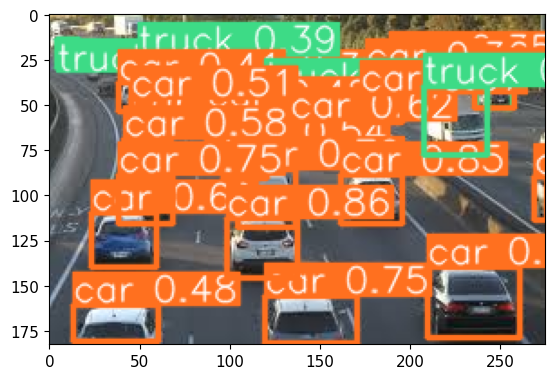

In [25]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [26]:
np.array(results.render()).shape

(1, 183, 275, 3)

In [27]:
np.squeeze(results.render()).shape

(183, 275, 3)

## 4. Real Time Detections

In [8]:
cap = cv2.VideoCapture(0)
# cap = cv2.VideoCapture('traffic.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## 5. Train from Scratch

In [3]:
import uuid #unique identifier
import os
import time

In [29]:
IMAGES_PATH = os.path.join('data','images')
labels = ['awake', 'drowsy']
number_imgs = 20

In [14]:
cap = cv2.VideoCapture(0)
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    #loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        #webcam feed
        ret, frame = cap.read()
        #naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        #writes out image to file
        cv2.imwrite(imgname, frame)
        #render to the screen
        cv2.imshow('Image Collection', frame)
        #2 second time delay between captures
        time.sleep(2)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [15]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [16]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
                                              0.0/3.8 MB ? eta -:--:--
     ----                                     0.4/3.8 MB 8.3 MB/s eta 0:00:01
     -----------------                        1.6/3.8 MB 14.8 MB/s eta 0:00:01
     ----------------------------             2.7/3.8 MB 17.1 MB/s eta 0:00:01
     --------------------------------------   3.6/3.8 MB 17.8 MB/s eta 0:00:01
     ---------------------------------------- 3.8/3.8 MB 16.0 MB/s eta 0:00:00


In [1]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 400 --data dataset.yaml --weights yolov5s.pt --workers 2

^C


## 6. Load Custom Model

In [4]:
model = torch.hub.load('ultralytics/yolov5','custom',path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\HP/.cache\torch\hub\master.zip
YOLOv5  2023-6-21 Python-3.10.0 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce 840M, 2048MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [5]:
img = os.path.join('data','images','drowsy.6b92c95f-0d92-11ee-82e2-8cdcd472c3c1.jpg')

In [6]:
results = model(img)
results.print()

image 1/1: 480x640 (no detections)
Speed: 88.0ms pre-process, 78.7ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


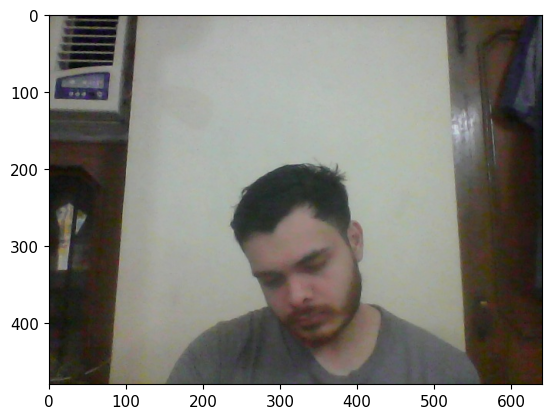

In [7]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [8]:
cap = cv2.VideoCapture(0)
# cap = cv2.VideoCapture('traffic.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()